In [11]:
# pip install librosa matplotlib praat-parselmouth


In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [13]:
from extract_features import *

In [14]:
real_audio_file = '../LJSpeech-1.1/wavs/LJ001-0001.wav'
fake_audio_file = '../generated_audio/ljspeech_melgan/LJ001-0001_gen.wav'

real_y, real_sr = librosa.load(real_audio_file)
fake_y, fake_sr = librosa.load(fake_audio_file)

# Prosodic Features

- Fundamental Frequency (F0)
- Energy
- Speaking Rate
- Pauses
- Intonation

In [15]:
# Extract features for real and fake audio
real_f0, real_times_f0 = extract_f0(real_y, real_sr)
fake_f0, fake_times_f0 = extract_f0(fake_y, fake_sr)

real_energy, real_times_energy = extract_energy(real_y)
fake_energy, fake_times_energy = extract_energy(fake_y)

real_speaking_rate, real_pauses = extract_speaking_rate_and_pauses(real_audio_file)
fake_speaking_rate, fake_pauses = extract_speaking_rate_and_pauses(fake_audio_file)

real_pitches, real_times_pitches = extract_intonation(real_y, real_sr)
fake_pitches, fake_times_pitches = extract_intonation(fake_y, fake_sr)

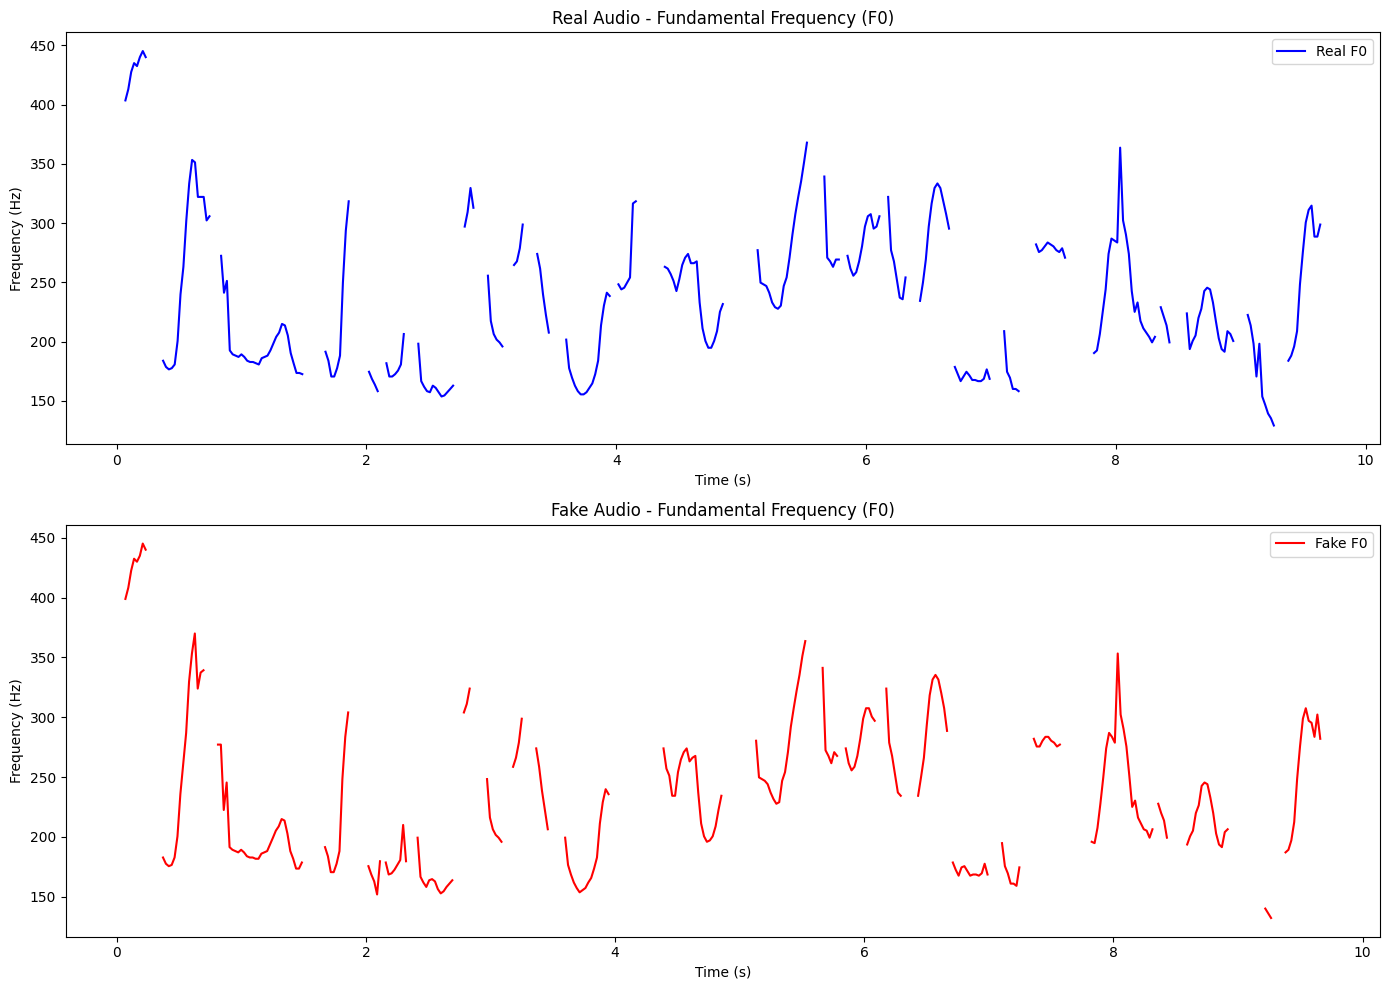

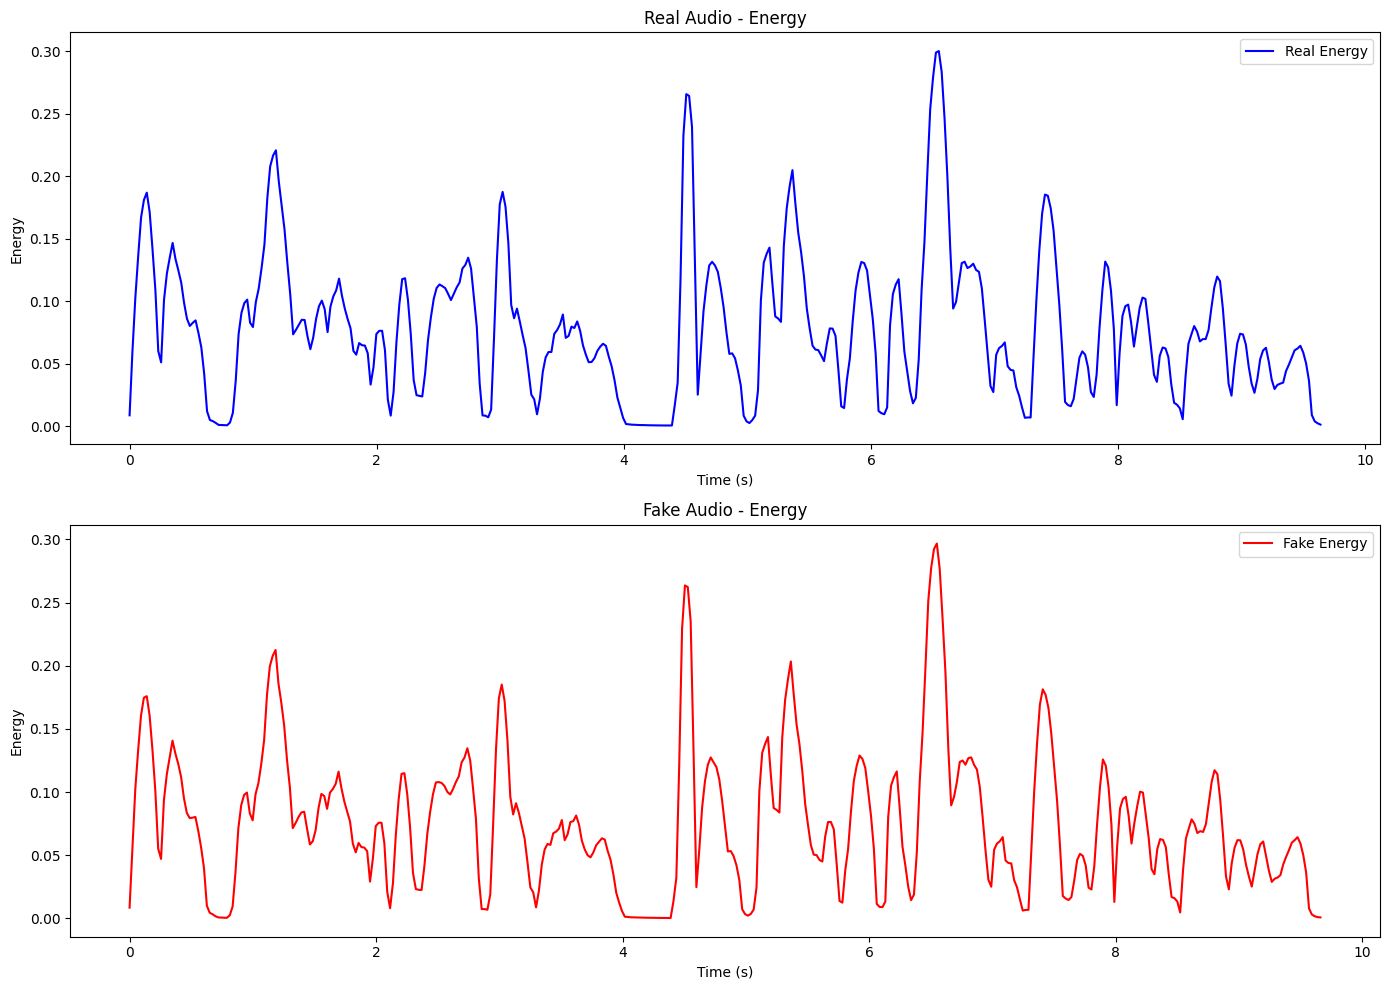

Real Speaking Rate: 123.35562935371291 syllables/second
Real Pauses: [(0.5955056689342406, 0.8755056689342405), (1.8435056689342406, 2.1635056689342407), (2.2755056689342408, 2.4115056689342405), (2.811505668934241, 2.9635056689342405), (3.9475056689342405, 4.4515056689342405), (4.931505668934241, 5.11550566893424), (5.611505668934241, 5.82750566893424), (6.027505668934241, 6.16350566893424), (7.19550566893424, 7.33950566893424), (7.5395056689342415, 7.819505668934241), (8.28350566893424, 8.56350566893424), (9.08350566893424, 9.37150566893424), (9.53150566893424, 9.65501133786848)]
Fake Speaking Rate: 123.09124286358173 syllables/second
Fake Pauses: [(0.5937505668934246, 0.8737505668934246), (1.8497505668934247, 2.1617505668934247), (2.273750566893425, 2.4097505668934245), (2.809750566893425, 2.9617505668934245), (3.9377505668934245, 4.4497505668934245), (4.929750566893425, 5.121750566893425), (5.609750566893425, 5.825750566893424), (6.025750566893425, 6.161750566893424), (7.1937505668

/var/folders/7w/mm9ktp7n75dgn8rjth6_zv_m0000gn/T/ipykernel_70611/3513197738.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/7w/mm9ktp7n75dgn8rjth6_zv_m0000gn/T/ipykernel_70611/3513197738.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


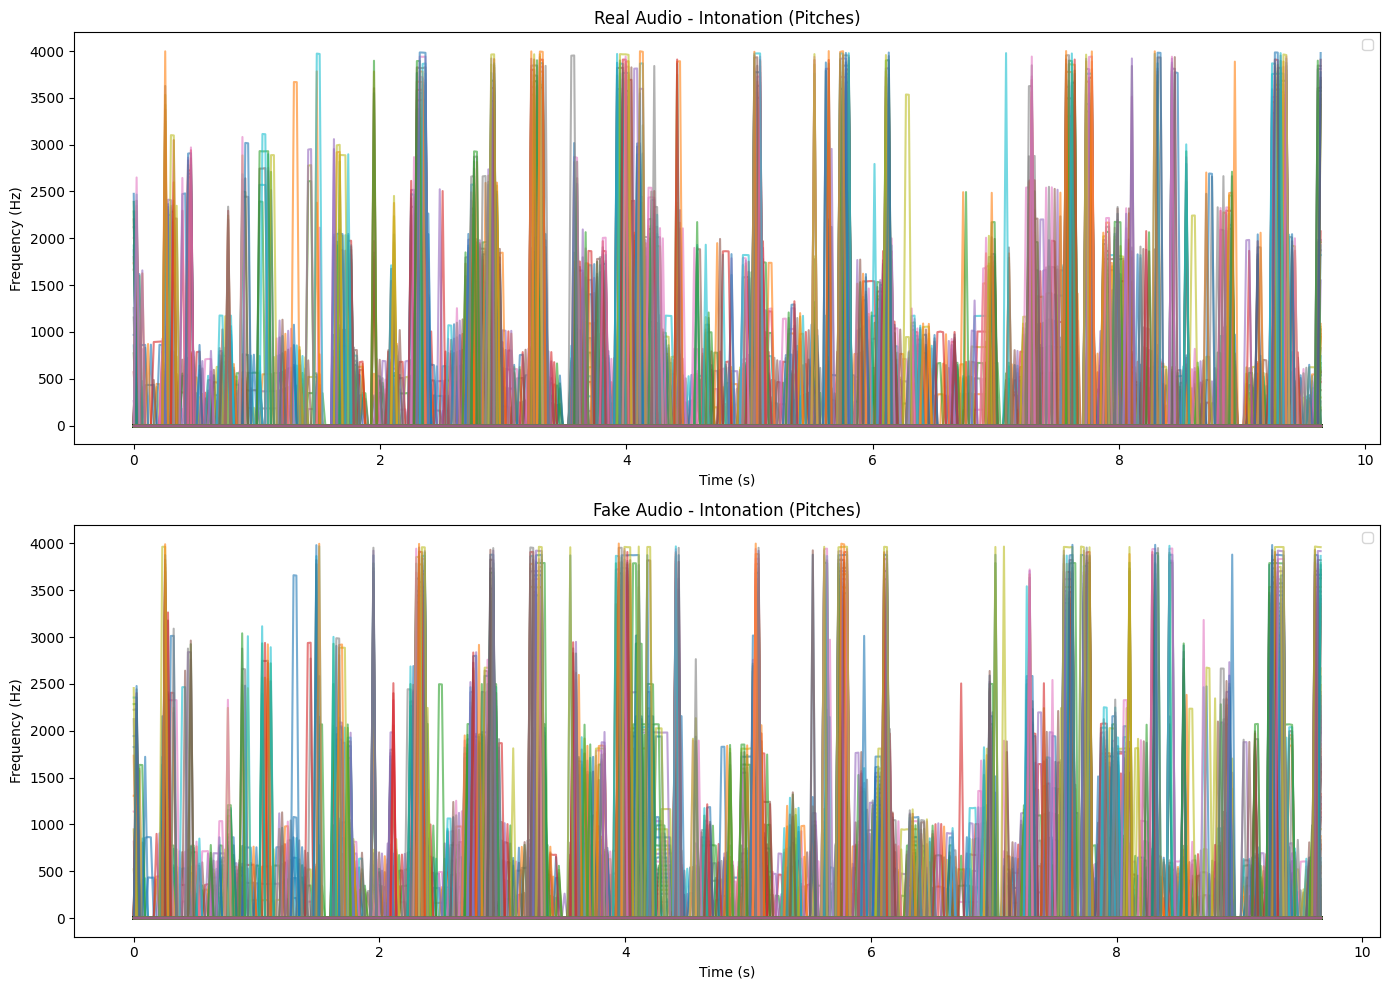

In [16]:

# Plot F0 (Fundamental Frequency)
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.plot(real_times_f0, real_f0, label='Real F0', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Real Audio - Fundamental Frequency (F0)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(fake_times_f0, fake_f0, label='Fake F0', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Fake Audio - Fundamental Frequency (F0)')
plt.legend()
plt.tight_layout()
plt.show()

# Plot Energy
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.plot(real_times_energy, real_energy, label='Real Energy', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.title('Real Audio - Energy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(fake_times_energy, fake_energy, label='Fake Energy', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.title('Fake Audio - Energy')
plt.legend()
plt.tight_layout()
plt.show()

# Print Speaking Rate and Pauses
print(f"Real Speaking Rate: {real_speaking_rate} syllables/second")
print("Real Pauses:", real_pauses)
print(f"Fake Speaking Rate: {fake_speaking_rate} syllables/second")
print("Fake Pauses:", fake_pauses)

# Plot Intonation (Pitches)
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.plot(real_times_pitches, real_pitches.T, alpha=0.6)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Real Audio - Intonation (Pitches)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(fake_times_pitches, fake_pitches.T, alpha=0.6)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Fake Audio - Intonation (Pitches)')
plt.legend()
plt.tight_layout()
plt.show()


# Temporal Features

- Zero-Crossing Rate
- Autocorrelation

In [17]:
# Extract features for real and fake audio
real_zcr, real_times_zcr = extract_zero_crossing_rate(real_y, real_sr)
fake_zcr, fake_times_zcr = extract_zero_crossing_rate(fake_y, fake_sr)

real_autocorr, real_lags = extract_autocorrelation(real_y, real_sr)
fake_autocorr, fake_lags = extract_autocorrelation(fake_y, fake_sr)

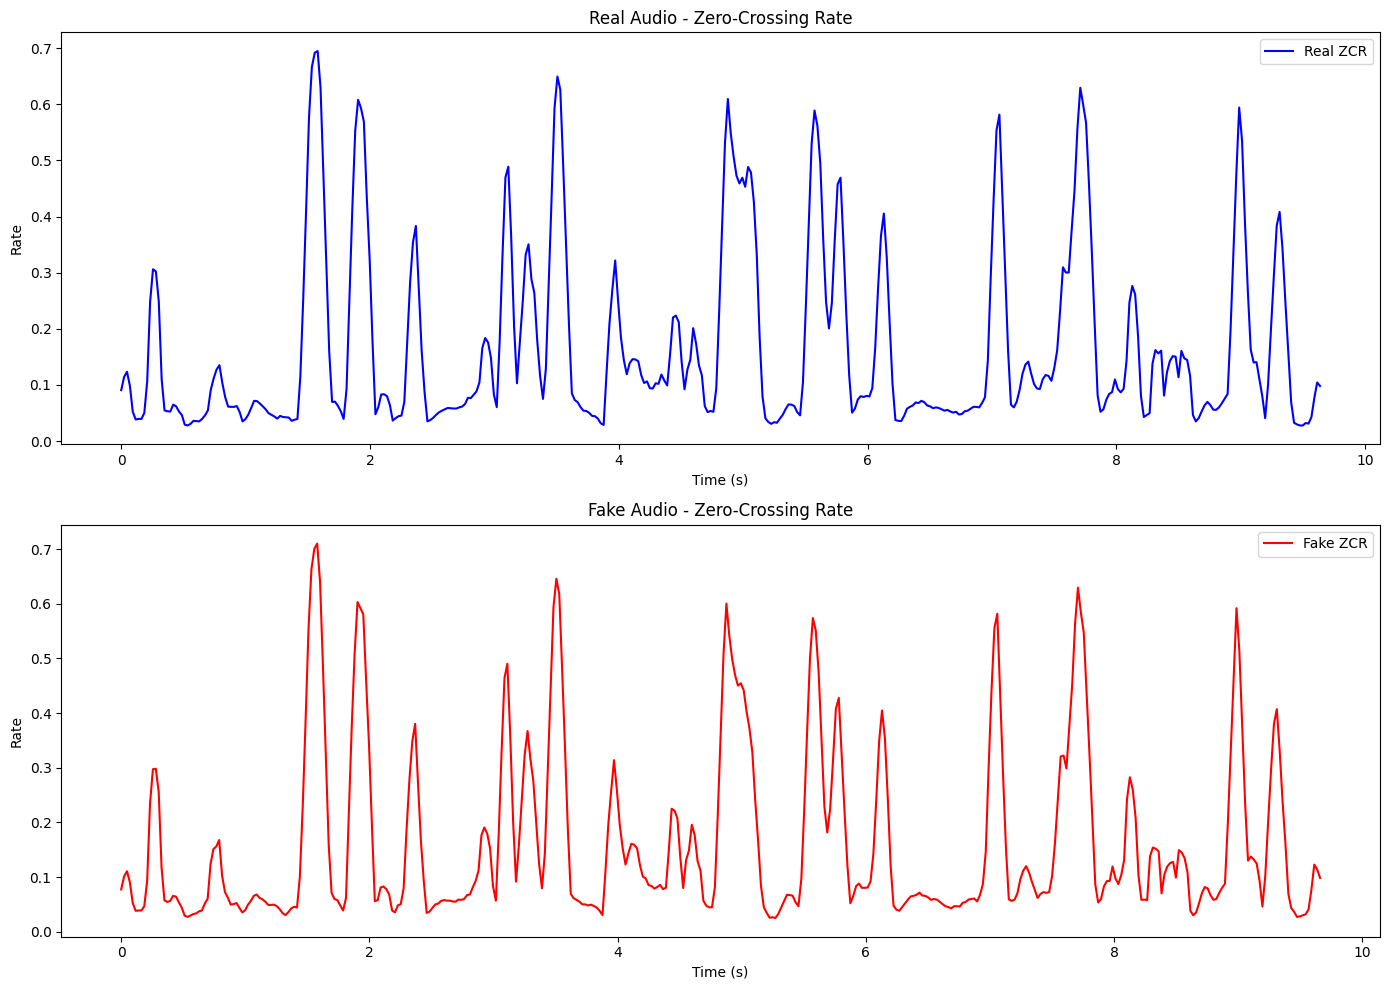

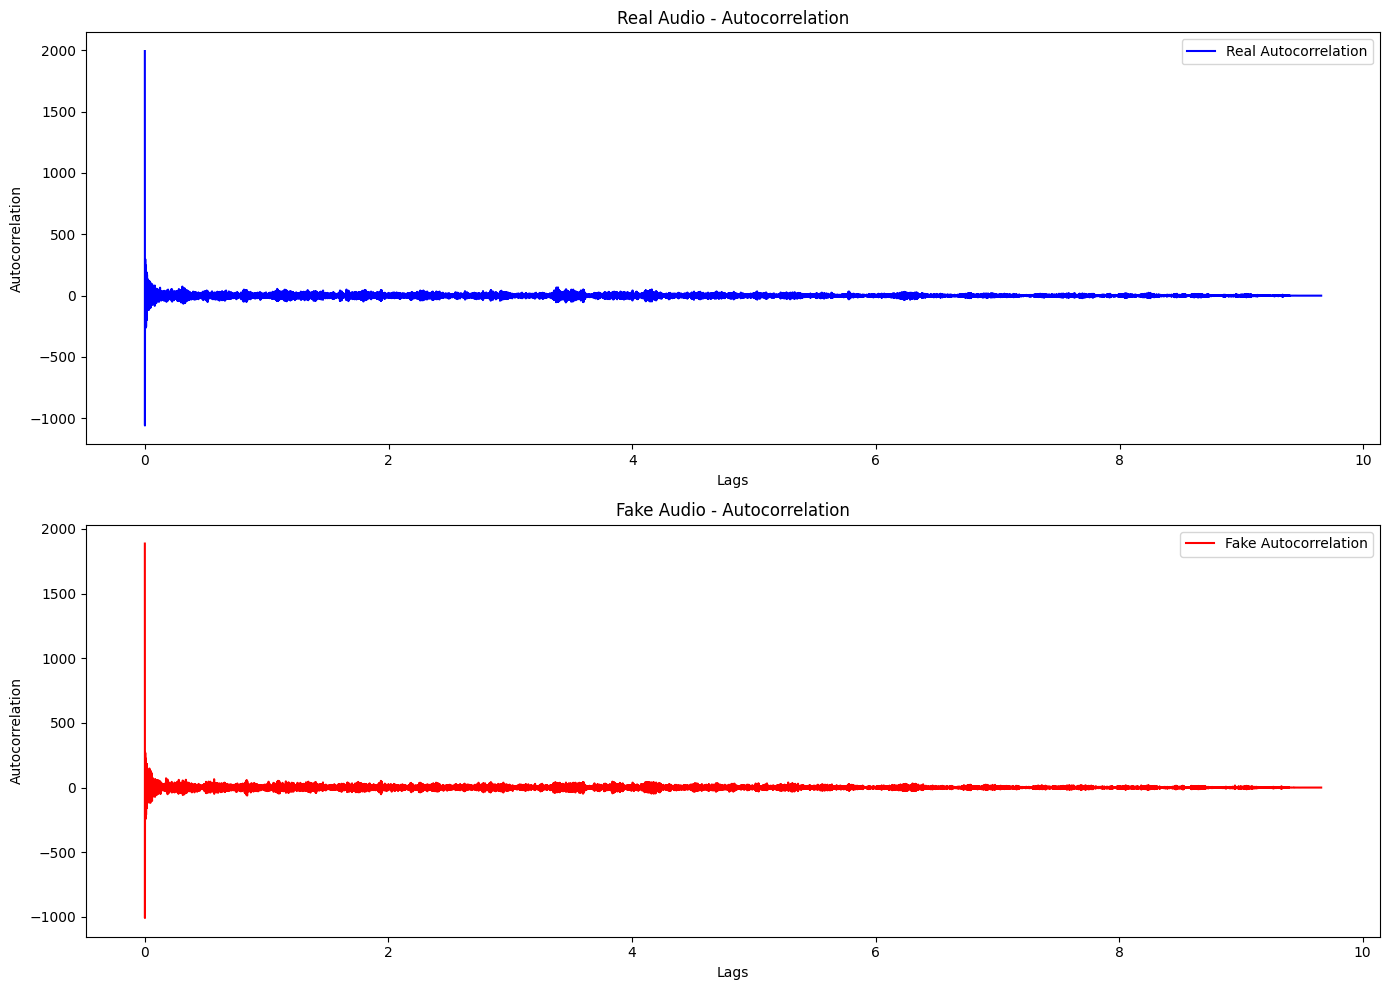

In [18]:
# Plot Zero-Crossing Rate
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.plot(real_times_zcr, real_zcr, label='Real ZCR', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Rate')
plt.title('Real Audio - Zero-Crossing Rate')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(fake_times_zcr, fake_zcr, label='Fake ZCR', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Rate')
plt.title('Fake Audio - Zero-Crossing Rate')
plt.legend()
plt.tight_layout()
plt.show()

# Plot Autocorrelation
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.plot(real_lags, real_autocorr, label='Real Autocorrelation', color='b')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Real Audio - Autocorrelation')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(fake_lags, fake_autocorr, label='Fake Autocorrelation', color='r')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Fake Audio - Autocorrelation')
plt.legend()
plt.tight_layout()
plt.show()
